In [10]:
import numpy as np
import pandas as pd
covid_death = pd.read_csv("CovidDeaths.csv")
covid_vaccine = pd.read_csv("CovidVaccinations.csv")

In [11]:
covid_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               85171 non-null  object 
 1   continent                              81060 non-null  object 
 2   location                               85171 non-null  object 
 3   date                                   85171 non-null  object 
 4   total_cases                            83072 non-null  float64
 5   new_cases                              83070 non-null  float64
 6   new_cases_smoothed                     82069 non-null  float64
 7   total_deaths                           73408 non-null  float64
 8   new_deaths                             73566 non-null  float64
 9   new_deaths_smoothed                    82069 non-null  float64
 10  total_cases_per_million                82623 non-null  float64
 11  ne

In [12]:
#Looking at total cases vs total deaths
covid_death["cases_death"] = 100*covid_death["total_deaths"]/covid_death["total_cases"]
covid_death.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,cases_death
0,AFG,Asia,Afghanistan,2/24/2020,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2/25/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2/26/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2/27/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2/28/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [13]:
covid_death_subset = covid_death[["location", "date", "total_cases", "total_deaths", "cases_death"]]
covid_death_subset.head()

,location,date,total_cases,total_deaths,cases_death
0,Afghanistan,2/24/2020,1.0,NaN,NaN
1,Afghanistan,2/25/2020,1.0,NaN,NaN
2,Afghanistan,2/26/2020,1.0,NaN,NaN
3,Afghanistan,2/27/2020,1.0,NaN,NaN
4,Afghanistan,2/28/2020,1.0,NaN,NaN


In [14]:
countries = ["Afghanistan","India", "United States", "Brazil", "Italy"]  # Select countries
countries_filtered = covid_death[covid_death["location"].isin(countries)]

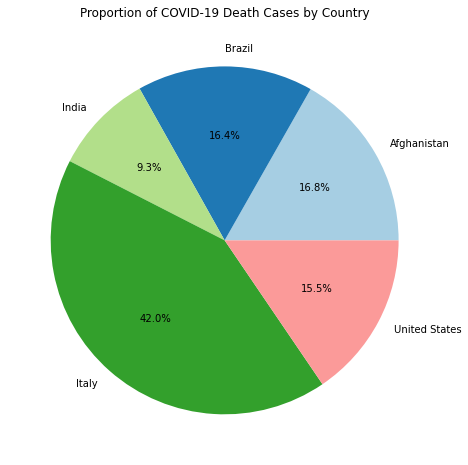

In [15]:
import matplotlib.pyplot as plt
country_death_sum = countries_filtered.groupby("location")["cases_death"].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_death_sum, labels=country_death_sum.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Title
plt.title("Proportion of COVID-19 Death Cases by Country")

plt.show()

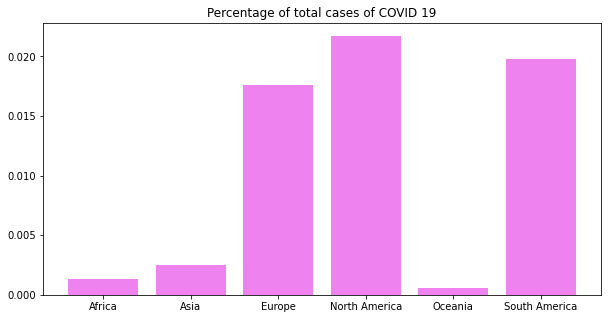

In [16]:
#Looking at Total cases and population
continent_grouped = covid_death.groupby("continent")["total_cases"].sum() / covid_death.groupby("continent")["population"].sum()
plt.figure(figsize=(10, 5))
plt.bar(continent_grouped.index, continent_grouped.values,color='violet')
plt.title("Percentage of total cases of COVID 19")
plt.show()